### MPG Test - Exploratory data analysis

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

The variables

    1. mpg:           continuous (Milles per gallon)
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous cu. inches Is the measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers
    4. horsepower:    continuous
    5. weight:        continuous (lbs)
    6. acceleration:  continuous - time to accelerate form 0 to 60mph (sec)
    7. model year:    multi-valued discrete 
    8. origin:        multi-valued discrete - Country
    9. car name:      string (unique for each instance)

In [2]:
import re

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### 1. Create a notebook in collab and load the data.

In [3]:
def load_data(file, csv_file):
    with open(file, 'r') as file:
        content = file.readlines()
    parsed_content = []
    for line in content:
        line = line.replace('\t', ',')
        split_line = line.split(',')
        replaced = re.sub('\s+', ';', split_line[0])
        parsed_content.append(f'{replaced};{split_line[1]}')

    with open(csv_file, 'w') as writer:
        for line in parsed_content:
            writer.writelines(line)
    columns_name = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
    auto_mpg_data = pd.read_csv(csv_file, sep=';', names=columns_name)
    return columns_name, auto_mpg_data

In [4]:
columns_name, auto_mpg_data_raw = load_data("auto-mpg.data-original", "auto-mpg.csv")
print(auto_mpg_data_raw.info())
auto_mpg_data_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB
None


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


 ### 2. Apply any transformation if it is necessary, (ej categorical to numerical, Miles to Km)}

#### Missing values

I am going to fill in the missing horsepower values with information from the internet because the dataset has few rows so I can better model and remove the missing mpg values.

In [5]:
print(auto_mpg_data_raw.isnull().sum())
auto_mpg_data_raw[auto_mpg_data_raw['horsepower'].isnull()]

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In [6]:
auto_mpg_data_raw.at[38, 'horsepower'] = 82
auto_mpg_data_raw.at[133, 'horsepower'] = 70
auto_mpg_data_raw.at[337, 'horsepower'] = 45
auto_mpg_data_raw.at[343, 'horsepower'] = 86
auto_mpg_data_raw.at[361, 'horsepower'] = 75
auto_mpg_data_raw.at[382, 'horsepower'] = 82

auto_mpg_data_raw = auto_mpg_data_raw[~auto_mpg_data_raw.mpg.isnull()].copy()

In [7]:
auto_mpg_data_raw.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

#### Transform data

In [8]:
#converting cu inches to cu cm(cc)
auto_mpg_data_raw['displacement'] = auto_mpg_data_raw['displacement']*16.387

#converting lbs to kg
auto_mpg_data_raw['weight'] = auto_mpg_data_raw['weight']/2.205

#converting mpg to kpl
auto_mpg_data_raw['kpl'] = auto_mpg_data_raw['mpg']/2.352
auto_mpg_data_raw.drop(['mpg'], axis=1, inplace=True)

auto_mpg_data_raw['horsepower'] = auto_mpg_data_raw['horsepower'].astype(int)
auto_mpg_data = auto_mpg_data_raw.copy()

#### Create dummies variables according to origin variable

In [9]:
origin = auto_mpg_data.pop('origin')

auto_mpg_data['USA'] = (origin == 1)*1
auto_mpg_data['Europe'] = (origin == 2)*1
auto_mpg_data['Japan'] = (origin == 3)*1

auto_mpg_data.to_csv('auto_mpg_data_ml_raw.csv', index=False)

#### Extract the company name of the car_name variable

In [18]:
auto_mpg_data['company_name'] = auto_mpg_data.car_name.str.extract('(^.*?)\s')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace(['volkswagen','vokswagen','vw'],'VW')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace('maxda','mazda')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace('toyouta','toyota')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace('mercedes','mercedes-benz')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace('nissan','datsun')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace('capri','ford')
auto_mpg_data['company_name'] = auto_mpg_data['company_name'].replace(['chevroelt','chevy'],'chevrolet')
auto_mpg_data['company_name'].fillna(value = 'subaru',inplace=True)
auto_mpg_data[auto_mpg_data['company_name'] == ''] = 'subaru'

auto_mpg_data['car_name'] = auto_mpg_data.car_name.str.extract('^.*?(\s.*)')
auto_mpg_data['car_name'].fillna(value = 'subaru',inplace=True)
auto_mpg_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,kpl,USA,Europe,Japan,company_name
0,8,5030.81,130,1589.12,12,70,chevelle malibu,7.65306,1,0,0,chevrolet
1,8,5735.45,165,1674.83,11.5,70,skylark 320,6.37755,1,0,0,buick
2,8,5211.07,150,1558.28,11,70,satellite,7.65306,1,0,0,plymouth
3,8,4981.65,150,1556.92,12,70,rebel sst,6.80272,1,0,0,amc
4,8,4948.87,140,1564.17,10.5,70,torino,7.22789,1,0,0,ford


In [19]:
auto_mpg_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,kpl,USA,Europe,Japan,company_name
0,8,5030.81,130,1589.12,12,70,chevelle malibu,7.65306,1,0,0,chevrolet
1,8,5735.45,165,1674.83,11.5,70,skylark 320,6.37755,1,0,0,buick
2,8,5211.07,150,1558.28,11,70,satellite,7.65306,1,0,0,plymouth
3,8,4981.65,150,1556.92,12,70,rebel sst,6.80272,1,0,0,amc
4,8,4948.87,140,1564.17,10.5,70,torino,7.22789,1,0,0,ford


In [20]:
dummies = pd.get_dummies(auto_mpg_data['company_name'])

auto_mpg_data = pd.concat([auto_mpg_data, dummies], axis=1)
auto_mpg_data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,kpl,USA,Europe,...,opel,peugeot,plymouth,pontiac,renault,saab,subaru,toyota,triumph,volvo
0,8,5030.81,130,1589.12,12,70,chevelle malibu,7.65306,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8,5735.45,165,1674.83,11.5,70,skylark 320,6.37755,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8,5211.07,150,1558.28,11,70,satellite,7.65306,1,0,...,0,0,1,0,0,0,0,0,0,0
3,8,4981.65,150,1556.92,12,70,rebel sst,6.80272,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8,4948.87,140,1564.17,10.5,70,torino,7.22789,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
auto_mpg_data.drop(['car_name', 'company_name'], axis=1, inplace=True)


auto_mpg_data.to_csv('auto_mpg_data_ml.csv', index=False)
auto_mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 405
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cylinders      398 non-null    object
 1   displacement   398 non-null    object
 2   horsepower     398 non-null    object
 3   weight         398 non-null    object
 4   acceleration   398 non-null    object
 5   model_year     398 non-null    object
 6   kpl            398 non-null    object
 7   USA            398 non-null    object
 8   Europe         398 non-null    object
 9   Japan          398 non-null    object
 10  VW             398 non-null    uint8 
 11  amc            398 non-null    uint8 
 12  audi           398 non-null    uint8 
 13  bmw            398 non-null    uint8 
 14  buick          398 non-null    uint8 
 15  cadillac       398 non-null    uint8 
 16  chevrolet      398 non-null    uint8 
 17  chrysler       398 non-null    uint8 
 18  datsun         398 non-null   

### 3. Plot the relationships between the target value ante other variables

In [22]:
auto_mpg_data_relationship = auto_mpg_data_raw.copy()

auto_mpg_data_relationship['country_code'] = auto_mpg_data_relationship.origin.replace([1,2,3],['USA','Europe','Japan'])
auto_mpg_data_relationship.drop(['origin'], axis=1, inplace=True)

auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship.car_name.str.extract('(^.*?)\s')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace(['volkswagen','vokswagen','vw'],'VW')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace('maxda','mazda')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace('toyouta','toyota')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace('mercedes','mercedes-benz')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace('nissan','datsun')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace('capri','ford')
auto_mpg_data_relationship['company_name'] = auto_mpg_data_relationship['company_name'].replace(['chevroelt','chevy'],'chevrolet')
auto_mpg_data_relationship['company_name'].fillna(value = 'subaru',inplace=True)
auto_mpg_data_relationship[auto_mpg_data_relationship['company_name'] == ''] = 'subaru'

auto_mpg_data_relationship.drop(['car_name'], axis=1, inplace=True)

In [23]:
auto_mpg_data_relationship['horsepower']=auto_mpg_data_relationship['horsepower'].astype('float64')
auto_mpg_data_relationship['displacement']=auto_mpg_data_relationship['displacement'].astype('float64')
auto_mpg_data_relationship['weight']=auto_mpg_data_relationship['weight'].astype('float64')
auto_mpg_data_relationship['acceleration']=auto_mpg_data_relationship['acceleration'].astype('float64')

auto_mpg_data_relationship.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,kpl,country_code,company_name
0,8,5030.809,130.0,1589.115646,12.0,70,7.65306,USA,chevrolet
1,8,5735.450,165.0,1674.829932,11.5,70,6.37755,USA,buick
2,8,5211.066,150.0,1558.276644,11.0,70,7.65306,USA,plymouth
3,8,4981.648,150.0,1556.916100,12.0,70,6.80272,USA,amc
4,8,4948.874,140.0,1564.172336,10.5,70,7.22789,USA,ford


In [28]:
def categorical_relationship_vs_kpl(variable_name, dataframe):
    f, ax = plt.subplots(figsize=(20,10))
    fig = sns.boxplot(data=dataframe, x=variable_name, y="kpl")
    fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.axhline(dataframe.kpl.mean(), color='r', linestyle='dashed', linewidth=2)

def discrete_relationship_vs_kpl(variable_name, dataframe):
    sns.lmplot(x = variable_name, y = 'kpl', data=dataframe)

### Country code vs KPL

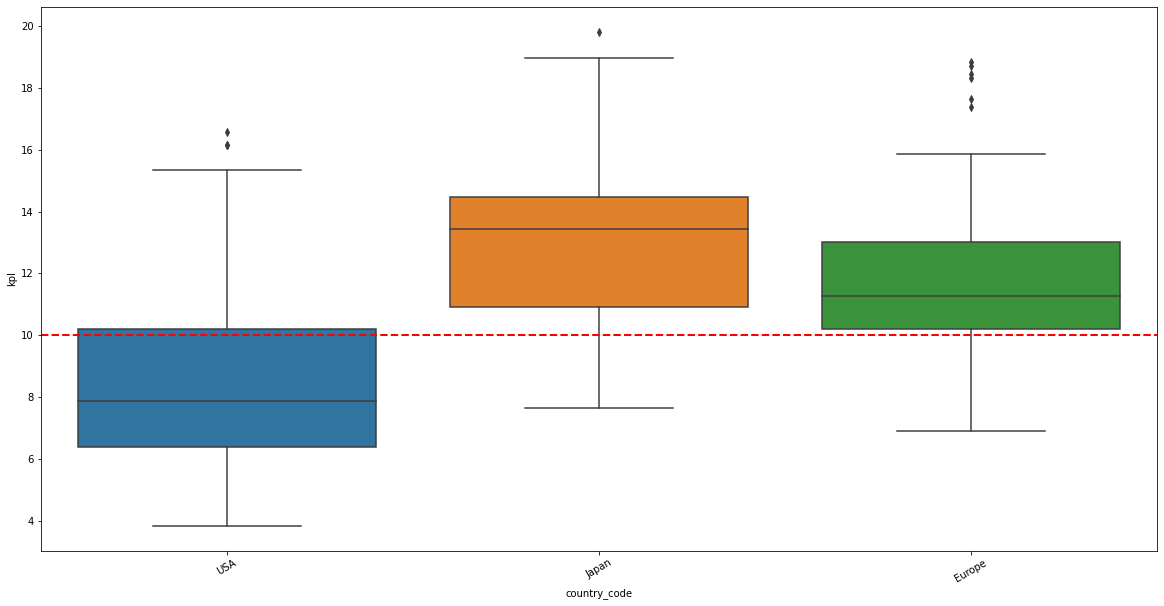

In [29]:
categorical_relationship_vs_kpl('country_code', auto_mpg_data_relationship)

The red line marks the average of kpl with this I can conclude:
    
    * Almost all cars in America (approx. 75%) are under to average of kpl (kilometers per liter)
    * Almost all cars in Japan and Europe are over to average of mpg (Kilometers per liter)
This can show that cars made in Japan and Europe have better fuel optimization compared to America.

### Model year vs KPL

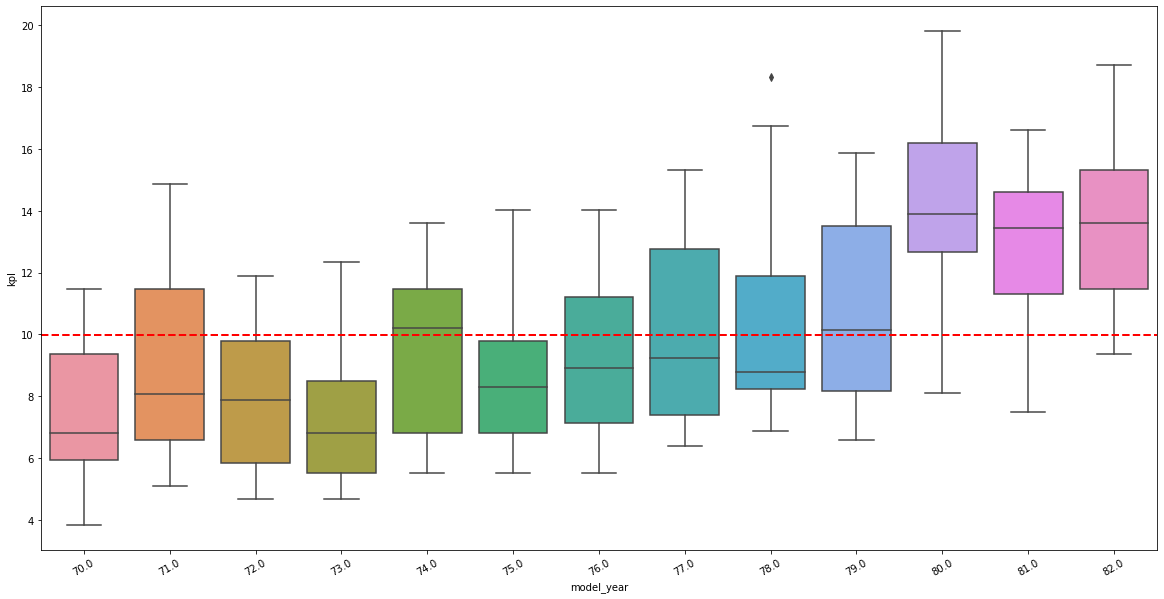

In [30]:
categorical_relationship_vs_kpl('model_year', auto_mpg_data_relationship)

Over time the kilometers per liter of the cars produced are increasing, as we can see in the graph. We can also see that in recent years, the cars produced optimize the use of fuel more because more than 75% of the cars are above the average.

### Cylinders vs KPL

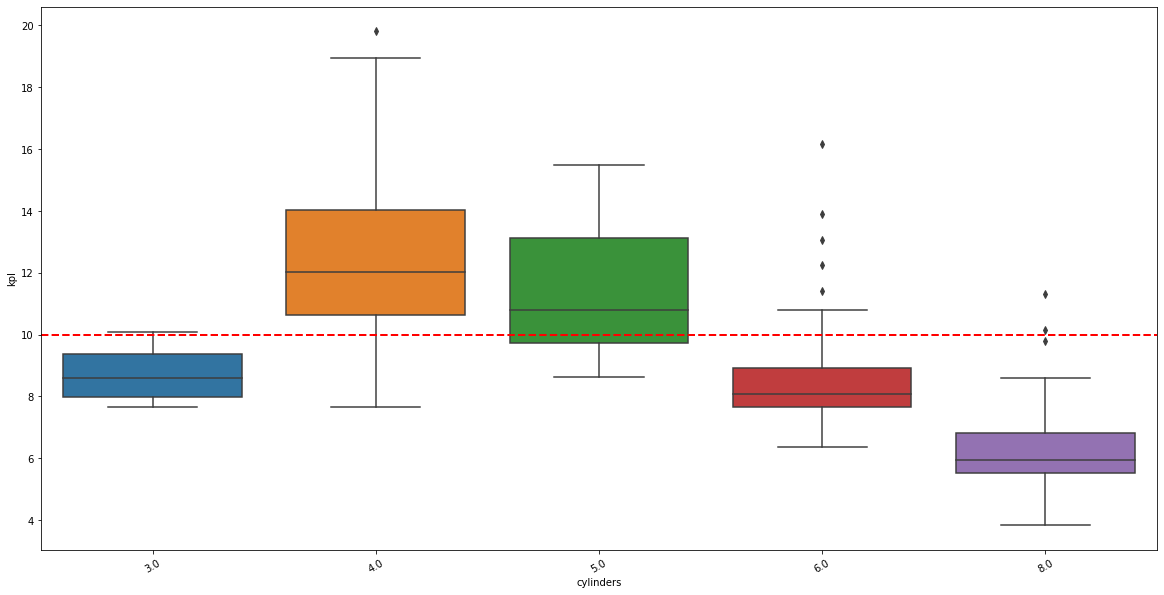

In [31]:
categorical_relationship_vs_kpl('cylinders', auto_mpg_data_relationship)

The most optimal number of cylinders for kilometers per liter are 4 and 5 in both categories more than 50% of the data is above average

### Company name vs KPL

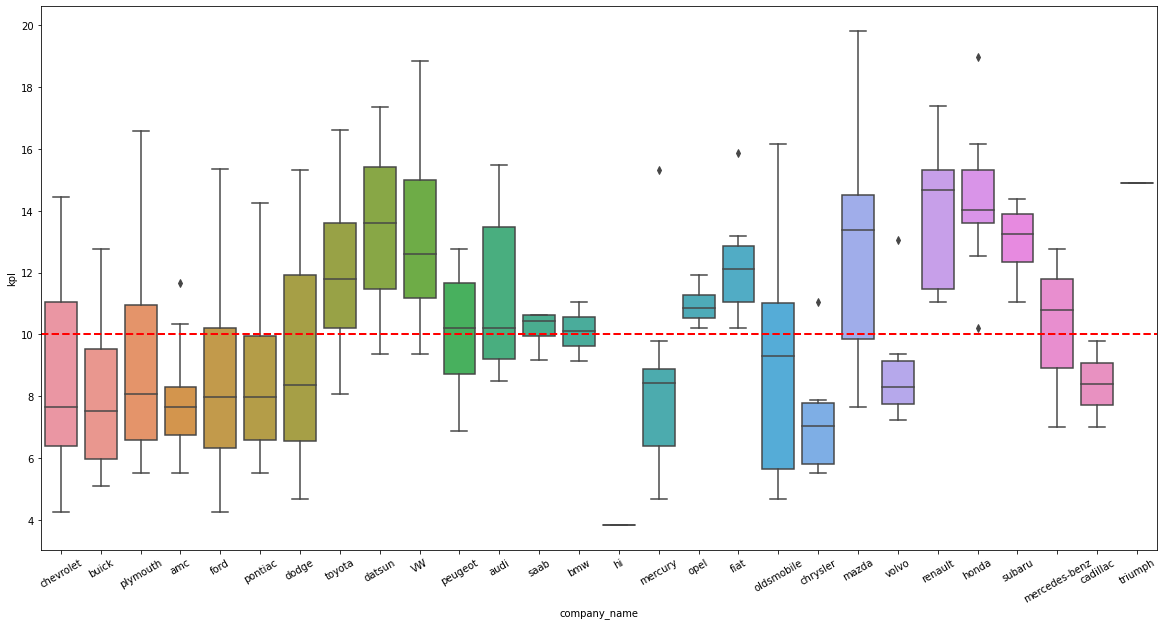

In [32]:
categorical_relationship_vs_kpl('company_name', auto_mpg_data_relationship)

In [34]:
usa_mpg_max = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'USA']['kpl'].max()
usa_mpg_min = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'USA']['kpl'].min()

europe_mpg_max = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'Europe']['kpl'].max()
europe_mpg_min = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'Europe']['kpl'].min()

japan_mpg_max = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'Japan']['kpl'].max()
japan_mpg_min = auto_mpg_data_relationship[auto_mpg_data_relationship['country_code'] == 'Japan']['kpl'].min()

In [36]:
auto_mpg_data_relationship[auto_mpg_data_relationship['kpl'] == usa_mpg_max].head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,kpl,country_code,company_name
351,4,1409.282,64.0,850.340136,16.4,81,16.5816,USA,plymouth


In [37]:
auto_mpg_data_relationship[auto_mpg_data_relationship['kpl'] == usa_mpg_min].head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,kpl,country_code,company_name
34,8,4981.648,193.0,2146.031746,18.5,70,3.82653,USA,hi


In [38]:
auto_mpg_data_relationship[auto_mpg_data_relationship['kpl'] == europe_mpg_max].head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,kpl,country_code,company_name
332,4,1474.83,48.0,945.578231,21.7,80,18.835,Europe,VW


In [39]:
auto_mpg_data_relationship[auto_mpg_data_relationship['kpl'] == europe_mpg_min].head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,kpl,country_code,company_name
284,6,2671.081,133.0,1546.485261,15.8,78,6.88776,Europe,peugeot


In [40]:
auto_mpg_data_relationship[auto_mpg_data_relationship['kpl'] == japan_mpg_max].head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,kpl,country_code,company_name
329,4,1409.282,65.0,956.9161,17.9,80,19.8129,Japan,mazda


In [41]:
auto_mpg_data_relationship[auto_mpg_data_relationship['kpl'] == japan_mpg_min].head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,kpl,country_code,company_name
0,8,5030.809,130.0,1589.115646,12.0,70,7.65306,USA,chevrolet
2,8,5211.066,150.0,1558.276644,11.0,70,7.65306,USA,plymouth
22,6,3261.013,97.0,1258.049887,15.5,70,7.65306,USA,amc
44,6,3801.784,100.0,1491.156463,15.5,71,7.65306,USA,amc
52,6,4227.846,110.0,1343.310658,13.5,71,7.65306,USA,amc


According to the company that produces we can see that most companies have cars above and below the average but the most relevant thing is that some companies produced all cars above the mpg average such as opel, fiat, renault, honda, subaru.
We can also note some relevant companies with these data such as the companies with the highest and lowest fuel efficiency according to the country of the company:
    
    -  MPG max in USA -> plymouth
    -  MPG min in USA -> hi
    
    -  MPG max in Europe -> VW or Volkwagen
    -  MPG min in Europe -> peugeot
    
    -  MPG max in Japan -> mazda
    -  MPG min in Japan -> chevrolet, plymouth, amc


### Correlation

### Stats

In [43]:
auto_mpg_data_raw[['kpl', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']].describe().T

,count,mean,std,min,25%,50%,75%,max
kpl,398.0,9.997693,3.323123,3.826531,7.440476,9.778912,12.329932,19.812925
displacement,398.0,3169.669886,1708.669838,1114.316000,1708.344750,2433.469500,4293.394000,7456.085000
horsepower,398.0,104.000000,38.424580,45.000000,75.000000,92.000000,125.000000,230.000000
weight,398.0,1347.131348,384.055226,731.519274,1008.503401,1271.428571,1636.281179,2331.065760
acceleration,398.0,15.568090,2.757689,8.000000,13.825000,15.500000,17.175000,24.800000
model_year,398.0,76.010050,3.697627,70.000000,73.000000,76.000000,79.000000,82.000000


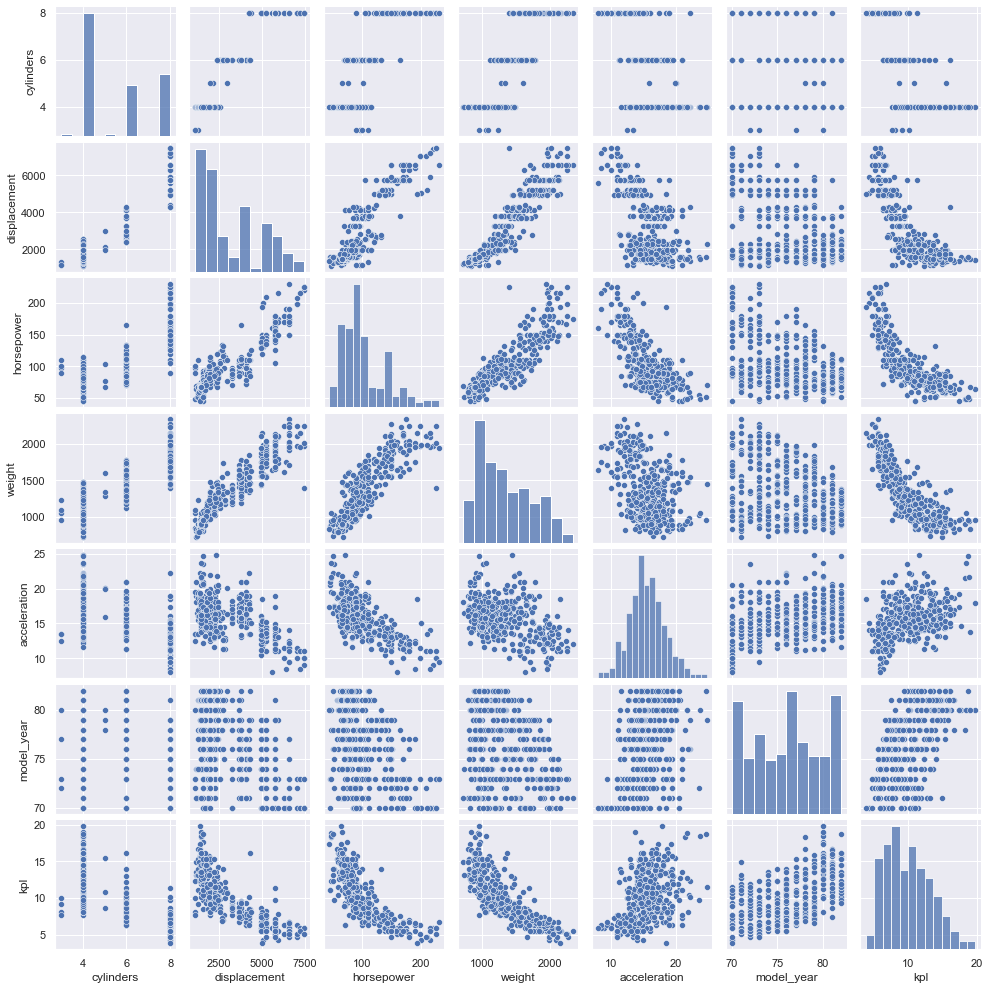

In [44]:
sns.set()
sns.pairplot(auto_mpg_data_relationship, height = 2.0)
plt.show()

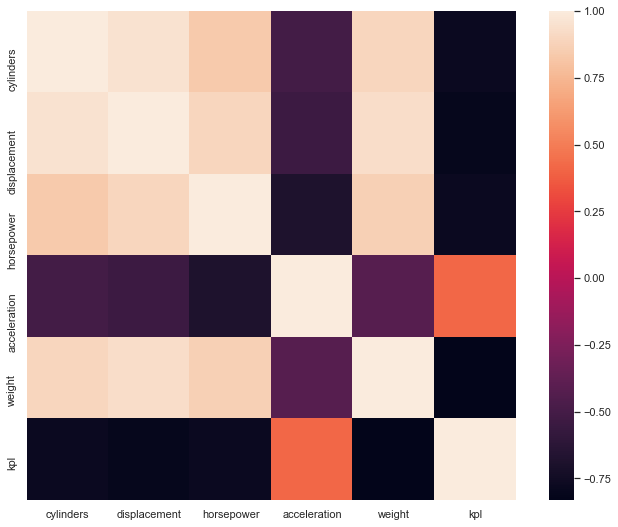

In [45]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','kpl']
corrmat = auto_mpg_data_raw[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

### Horsepower vs KPL

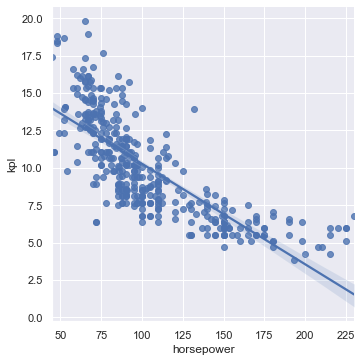

In [47]:
discrete_relationship_vs_kpl('horsepower', auto_mpg_data_raw)

The relationship linear between horsepower and mpg is inverse as we can see in the graph and that implies that each time the kpl increases, the horsepower decreases, which implies that each time the car has more power it needs more fuel.

### Weight vs KPL

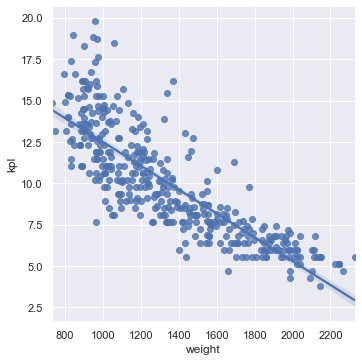

In [48]:
discrete_relationship_vs_kpl('weight', auto_mpg_data_raw)

The relationship between weight and mpg is inverse as we can see in the graph and that implies that each time the mpg increases, the weight decreases, which implies that each time the car is heavier it needs more fuel


### Displacement vs KPL

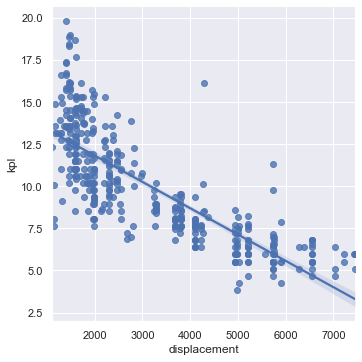

In [49]:
discrete_relationship_vs_kpl('displacement', auto_mpg_data_raw)

The relationship between distance and mpg is inverse as we can see in the graph and that implies that each time the mpg increases, the distance decreases, which implies that each time the car has more distance traveled, the fuel increases.


### Acceleration vs KPL

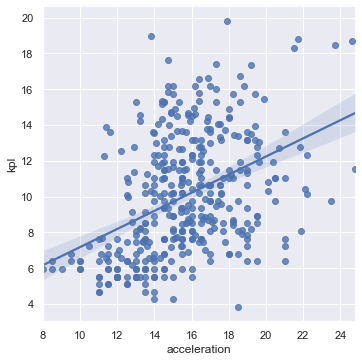

In [50]:
discrete_relationship_vs_kpl('acceleration', auto_mpg_data_raw)

The relationship between acceleration and kpl cannot be evidenced by the graph as we can see the points are quite scattered

In [53]:
auto_mpg_data_raw[auto_mpg_data_raw['kpl'] >= 14.880951].sort_values('kpl').head(10)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,kpl
61,4.0,1179.864,69,731.519274,18.0,71.0,3.0,datsun 1200,14.880952
342,4.0,1999.214,88,1133.786848,15.1,80.0,2.0,triumph tr7 coupe,14.880952
352,4.0,1327.347,60,798.185941,16.1,81.0,3.0,honda civic 1300,14.923469
302,4.0,1605.926,80,868.480726,14.4,79.0,1.0,dodge colt hatchback custom,15.178571
388,4.0,1966.440,88,979.591837,14.5,82.0,3.0,nissan stanza xe,15.306122
387,4.0,1605.926,70,963.718821,17.3,82.0,1.0,mercury lynx l,15.306122
399,4.0,2212.245,84,1074.829932,13.0,82.0,1.0,dodge charger 2.2,15.306122
225,4.0,1294.573,58,827.664399,18.6,77.0,2.0,renault 5 gtl,15.306122
389,4.0,1753.409,75,1000.000000,14.5,82.0,3.0,honda accord,15.306122
383,4.0,1720.635,74,897.959184,15.3,82.0,2.0,volkswagen rabbit l,15.306122


In [54]:
auto_mpg_data_raw.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,kpl
count,398.000000,398.000000,398.00000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,3169.669886,104.00000,1347.131348,15.568090,76.010050,1.572864,9.997693
std,1.701004,1708.669838,38.42458,384.055226,2.757689,3.697627,0.802055,3.323123
min,3.000000,1114.316000,45.00000,731.519274,8.000000,70.000000,1.000000,3.826531
25%,4.000000,1708.344750,75.00000,1008.503401,13.825000,73.000000,1.000000,7.440476
50%,4.000000,2433.469500,92.00000,1271.428571,15.500000,76.000000,1.000000,9.778912
75%,8.000000,4293.394000,125.00000,1636.281179,17.175000,79.000000,2.000000,12.329932
max,8.000000,7456.085000,230.00000,2331.065760,24.800000,82.000000,3.000000,19.812925
